## Matplotlib

### Plot a Single graph

In [ ]:
#Import
from matplotlib import pyplot as plt
import numpy as np

# Simple data
x = [10, 11, 12, 13, 14, 15, 16]
y = [100, 170, 200, 270, 300, 370, 400]

# Basic line plot
plt.plot(x,y)
plt.title('Graph One')
plt.xlabel('Size (m2)')
plt.ylabel('Price ($)')
plt.show()


### Plot 2 Graphs on a Chart

In [ ]:
A = [10, 11, 12, 13, 14, 15, 16]
B1 = [100, 170, 200, 270, 300, 370, 400]
B2 = [90, 110, 130, 150, 170, 190, 210]

#Explicit legend
plt.plot(A, B1)
plt.plot(A, B2)
plt.xlabel('Size (m2)')
plt.ylabel('Price ($)')
plt.title('Graph Two')
plt.legend(['Data 1', 'Data 2'])


### Styling with Colors, Linestyles, Markers

In [ ]:
plt.plot(A, B1, color='red', linestyle='-.', marker='.', label='Data 1')
plt.plot(A, B2, color='green', linestyle='--', marker='o', label='Data 2')
plt.title('Styled Graph')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()

### Line Width, Grid, and Advanced Styling

In [ ]:
plt.plot(A, B1, color='y', linestyle=':', marker='x', linewidth=2, label='Data 1')
plt.plot(A, B2, color='k', linestyle='--', marker='o', linewidth=3, label='Data 2')
plt.title('Advanced Styling')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.grid(True)
plt.show()

### Exploring Styles + Available Themes

In [ ]:
# Show available styles
print(plt.style.available)

# Use one
plt.style.use('ggplot')

# Re-plot with style
plt.plot(A, B1, label='Data 1')
plt.plot(A, B2, label='Data 2')
plt.title('Styled with ggplot')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()

## 📊 Real-World Data Visualization Task (with Matplotlib)

🎯 Problem Statement: Visualizing Cleaned Order Data

Now that you've cleaned and transformed the messy orders dataset, your next task as a Data Engineer is to help the analytics and business teams see the story behind the data. Visualization is a critical step for turning raw numbers into actionable insights.

In this exercise, you’ll use Matplotlib to create visuals that communicate patterns and trends in the cleaned orders data — making it easier for stakeholders to understand operational performance, customer behavior, and shipping reliability.

📄 About the Dataset: cleaned_orders_final.csv

This dataset is the cleaned version of a raw eCommerce order file. It contains important information about each order such as:

Order and shipping dates

Shipping costs

Country and city of delivery

Delivery status (on-time vs. late)

Calculated delivery time in days

The data has already been wrangled, deduplicated, and standardized. Now it’s ready for visual storytelling

💡 Your Objective:

By the end of this exercise, you will:

Create bar charts, histograms, line plots, and pie charts

Visualize shipping costs, delivery delays, and order volume

Identify patterns by country, month, and delivery performance

Gain a stronger understanding of how data visualization supports business decisions

## Importing libraries & reading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the cleaned orders data
df = pd.read_csv("cleaned_orders_final.csv")

df.head()

,OrderID,CustomerID,OrderDate,ShippedDate,ShippingCost,ShipCountry,ShipCity,ShippingCompany,DeliveryDays,DeliveryStatus,IsDomestic
0,1000.0,C001,2025-05-17,2025-07-30,234.09,Germany,Hamburg,Kiwilytics Goods Shipping LLC.,74.0,Late,Yes
1,1001.0,C002,2025-01-26,2025-07-30,320.61,Canada,Montreal,UPS Worldwide,185.0,Late,No
2,1002.0,C003,2025-03-08,2025-07-30,165.17,Canada,Vancouver,FedEx Logistics,144.0,Late,No
3,1003.0,C004,2025-03-24,2025-07-30,12.55,Germany,Munich,Aramex International,128.0,Late,Yes
4,1004.0,C005,2025-04-15,2025-07-30,186.36,Canada,Vancouver,FedEx Logistics,106.0,Late,No


# Convert date columns to datetime

In [2]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['ShippedDate'] = pd.to_datetime(df['ShippedDate'])


## Visualization 1: Shipping Cost by Country

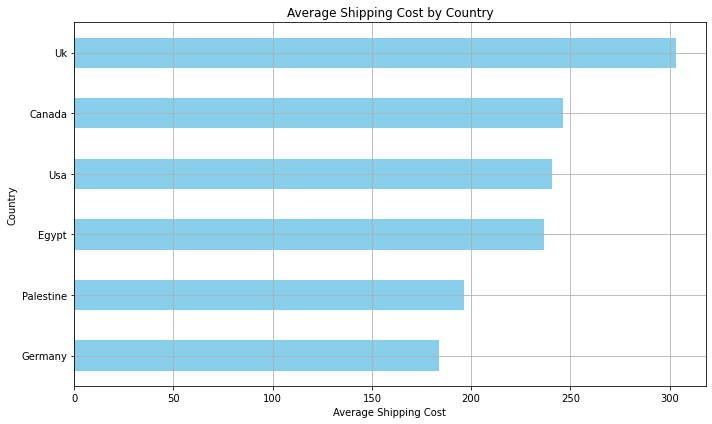

In [3]:
# Set the figure size for better readability
plt.figure(figsize=(10,6))

# Group data by country and calculate the average shipping cost per country
# Then sort the results for a cleaner horizontal bar chart
df.groupby("ShipCountry")["ShippingCost"].mean().sort_values().plot(
    kind="barh" # Horizontal bar chart
    ,color="skyblue"# Aesthetic color for the bars
    )

# Set the title of the plot
plt.title("Average Shipping Cost by Country")

# Label the X and Y axes
plt.xlabel("Average Shipping Cost")
plt.ylabel("Country")

# Show grid lines to improve readability
plt.grid(True)

# Automatically adjust layout to prevent label cutoff
plt.tight_layout()

# Display the final plot


## Visualization 2: Delivery Days Distribution

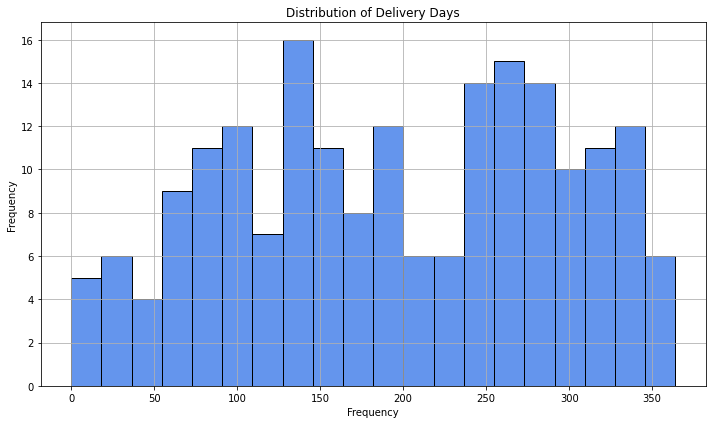

In [4]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plot a histogram of delivery days
# Drop any missing values to avoid errors
df["DeliveryDays"].dropna().plot(
    kind="hist",           # Histogram to show frequency distribution
    bins=20,               # Number of bins (intervals)
    color="#6495ED",       # Cornflower blue for visual appeal
    edgecolor="black"      # Black edges around the bars for clarity
)

# Add a title to the chart
plt.title("Distribution of Delivery Days")

# Label the X-axis and Y-axis
plt.xlabel("Delivery Days")
plt.xlabel("Frequency")

# Add gridlines for easier visual estimation
plt.grid(True)

# Adjust layout to avoid overlap or cut-off
plt.tight_layout()

# Render the plot
plt.show()

## Visualization 3: Delivery Status Count

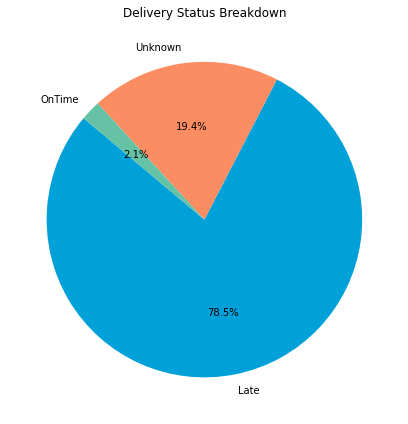

In [5]:
# Set the figure size (square shape is ideal for pie charts)
plt.figure(figsize=(6, 6))

# Create a pie chart of the delivery status counts
df["DeliveryStatus"].value_counts().plot(
    kind="pie",                    # Pie chart
    autopct='%1.1f%%',             # Show percentages with 1 decimal
    startangle=140,                # Start angle to rotate the chart for balance
    colors=["#00A1D9", "#fc8d62", "#66c2a5"]  # Custom colors (greenish and orange tones)
)

# Set the title of the plot
plt.title("Delivery Status Breakdown")

# Hide the y-axis label (not needed for pie charts)
plt.ylabel("")

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the pie chart
plt.show()


## Visualization 4: Monthly Order Volume

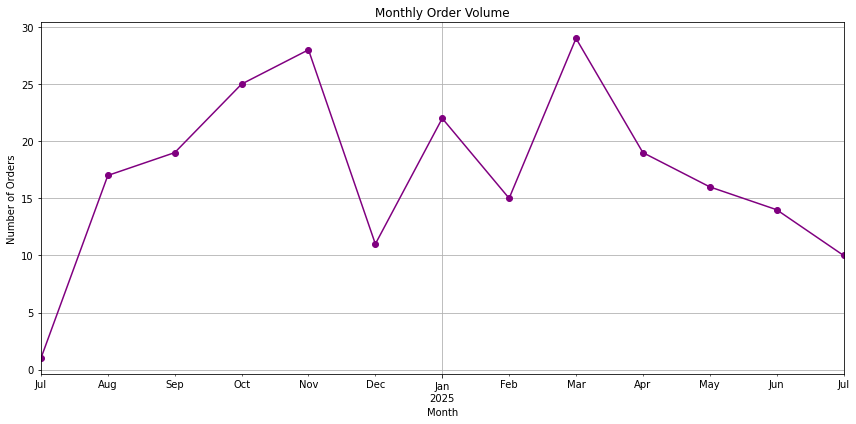

In [25]:
# Extract the month from the order date (format: YYYY-MM)
df["Months"] = df["OrderDate"].dt.to_period("M")

# Group the data by month and count the number of orders per month
monthly_orders = df.groupby("Months").size()

#print(monthly_orders)

# Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# Plot the monthly order volume as a line chart
monthly_orders.plot(kind ="line",marker="o",color = "purple")

# Add a title to the plot
plt.title("Monthly Order Volume")

# Label the axes
plt.xlabel("Month")
plt.ylabel("Number of Orders")
# Add gridlines for easier reading
plt.grid(True)

# Optimize layout spacing
plt.tight_layout()

# Display the chart
plt.show()
